In [112]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [113]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [114]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [115]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [116]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [117]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [118]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [119]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [120]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

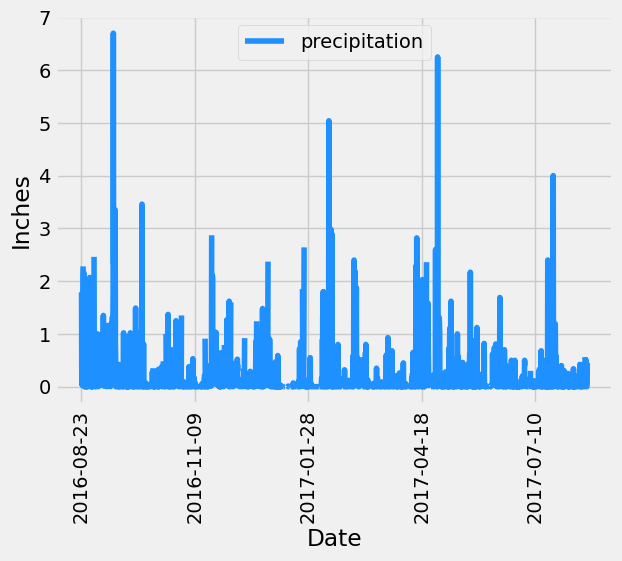

In [121]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
Date_most_recent = (session.query(measurement.date).order_by(measurement.date.desc()).first())[0]
Date_most_recent = dt.datetime.strptime(Date_most_recent, '%Y-%m-%d').date()
# Calculate the date one year from the last date in data set.
date_1year = Date_most_recent - dt.timedelta(days = 366)
# Perform a query to retrieve the data and precipitation scores
date_1year_text = date_1year.strftime('%Y-%m-%d')
precipitation_data = session.query(measurement.date,measurement.prcp).filter(measurement.date > date_1year_text).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df_precipitation = pd.DataFrame(precipitation_data,columns=["date","precipitation"])
df_precipitation.set_index("date", inplace = True)

# Sort the dataframe by date
df_precipitation = df_precipitation.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df_precipitation["precipitation"].plot(color="dodgerblue", legend=True)
plt.xticks(rotation = "vertical")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.tight_layout
plt.show()

In [122]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_precipitation.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [123]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(station.name).count()
print(number_stations)

9


In [124]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
rows_stations = session.query(measurement.station,func.count(measurement.station).label("count")).group_by(measurement.station).order_by("count")
for s in rows_stations:
    print(f"{s}")

('USC00518838', 511)
('USC00517948', 1372)
('USC00511918', 1979)
('USC00514830', 2202)
('USC00516128', 2612)
('USC00519523', 2669)
('USC00513117', 2709)
('USC00519397', 2724)
('USC00519281', 2772)


In [125]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
data_1 = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station =="USC00519281")
for row in data_1:
    print(row)

(54.0, 85.0, 71.66378066378067)


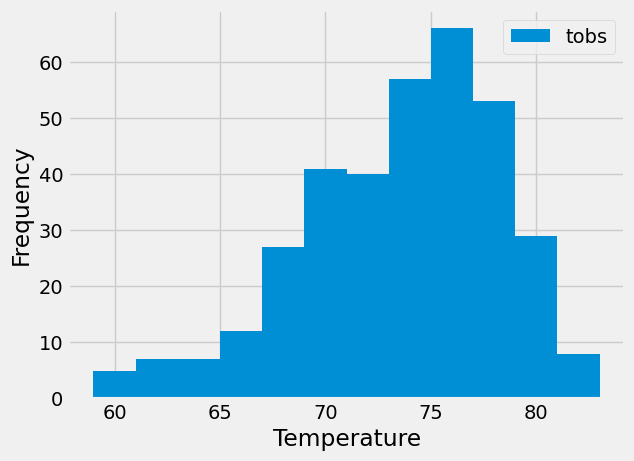

In [126]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs).filter(measurement.station=="USC00519281").filter(measurement.date> date_1year_text)
df_tobs_data = pd.DataFrame(tobs_data,columns=['tobs'])
plot2 = df_tobs_data.plot(kind = "hist", bins = 12, grid = True)
plt.xlabel("Temperature")
plt.show()

# Close Session

In [127]:
# Close Session
session.close()